# Comprehensive Report on Dataset Analysis

🎯 Find Data _Trends_ and _Patterns_

🎯 Find _correlations_ and _anomalies_

## Import relevant libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the dataset

In [35]:
properties_df = pd.read_csv('properties.csv')
properties_df_head = properties_df.head()
properties_df_describe = properties_df.describe(include='all')

properties_df_head, properties_df_describe

(   PropertyID     Location  Size_sqft  SalePrice
 0        2001       Suburb       2996     355372
 1        2002     Downtown       2887     505830
 2        2003       Suburb        957     338789
 3        2004  Countryside       1814     419335
 4        2005       Suburb        850     357301,
          PropertyID Location    Size_sqft      SalePrice
 count    100.000000      100   100.000000     100.000000
 unique          NaN        3          NaN            NaN
 top             NaN   Suburb          NaN            NaN
 freq            NaN       40          NaN            NaN
 mean    2050.500000      NaN  1832.410000  401866.300000
 std       29.011492      NaN   695.535926  116274.958848
 min     2001.000000      NaN   806.000000  205943.000000
 25%     2025.750000      NaN  1154.000000  303015.500000
 50%     2050.500000      NaN  1816.000000  403301.500000
 75%     2075.250000      NaN  2438.000000  506435.250000
 max     2100.000000      NaN  2996.000000  598378.000000)

## Exploratory Data Analysis 

### UNIVARIATE ANALYSIS
Explore the distributions of "individual variables"

C:\Users\User\AppData\Local\Temp\ipykernel_14872\2489701581.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=properties_df, x='Location', palette='crest')


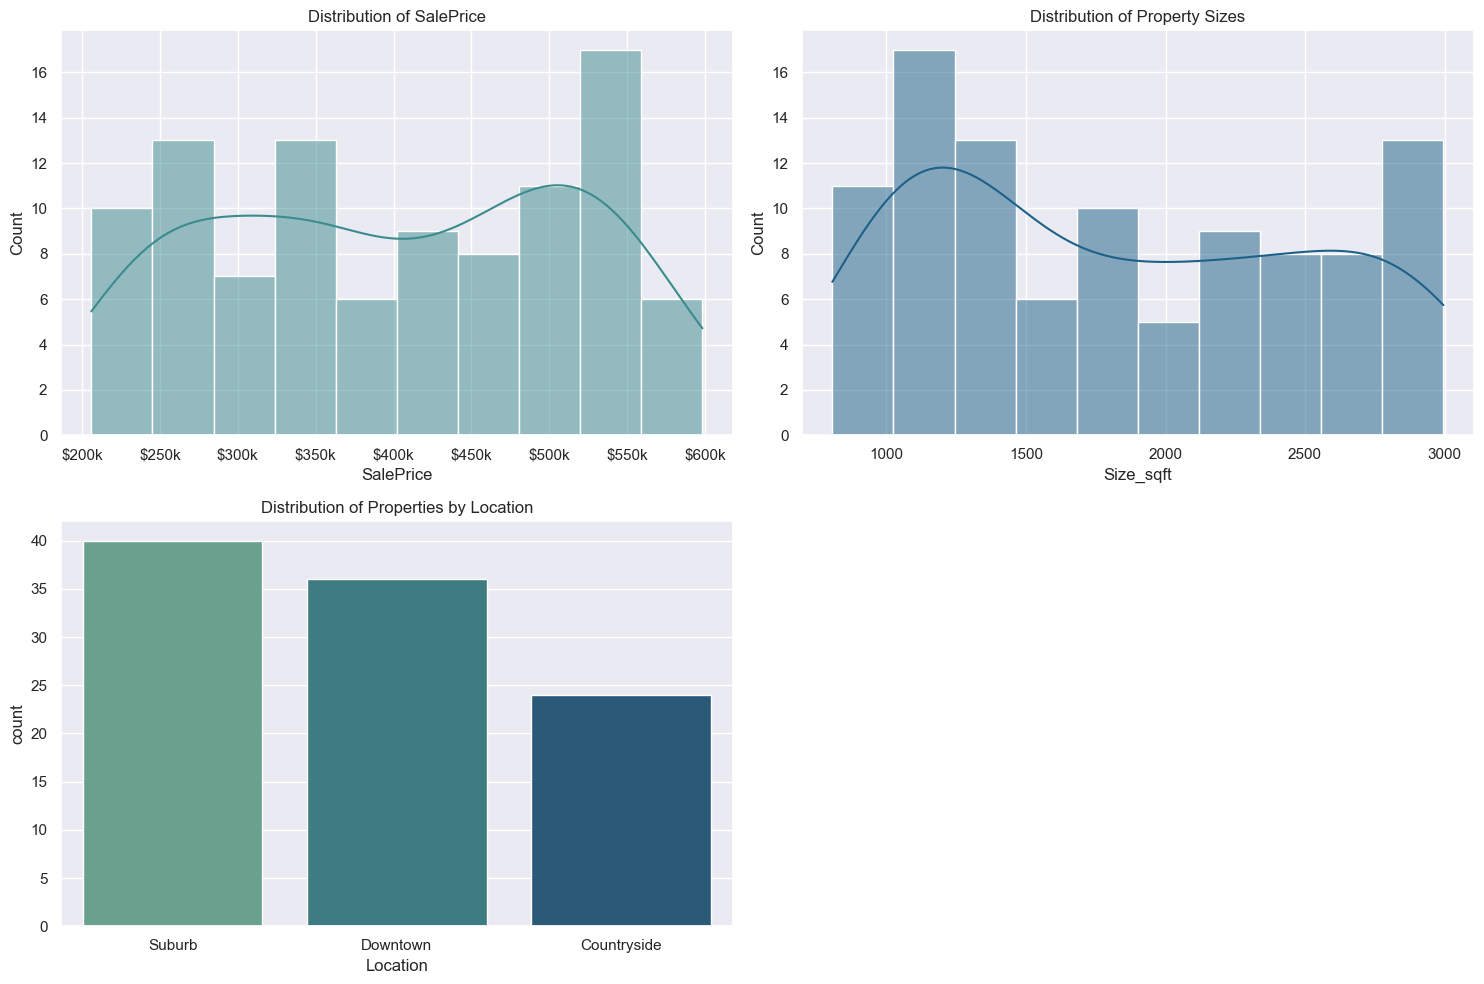

In [86]:
# Adjusting the color scheme for all 3 charts based on the 'viridis' palette

# Initialized the figure
plt.figure(figsize=(15,10))

# Setting up the color paletter
colors = sns.color_palette("crest", 10)

# Histogram for SalePrice
plt.subplot(2,2,1)
sns.histplot(properties_df['SalePrice'], kde=True, color=colors[4], bins=10)
plt.xticks([200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000],
           ['$200k', '$250k', '$300k', '$350k', '$400k', '$450k', '$500k', '$550k', '$600k'])
plt.title('Distribution of SalePrice')

# Boxplot for Size_sqft
plt.subplot(2,2,2)
sns.histplot(properties_df['Size_sqft'], kde=True, color=colors[7], bins=10)
plt.title('Distribution of Property Sizes')

# Bar chart for location type
plt.subplot(2,2,3)
sns.countplot(data=properties_df, x='Location', palette='crest')
plt.title('Distribution of Properties by Location')

plt.tight_layout()
plt.show()



### BIVARIATE ANALYSIS

Examine the relationship between variables

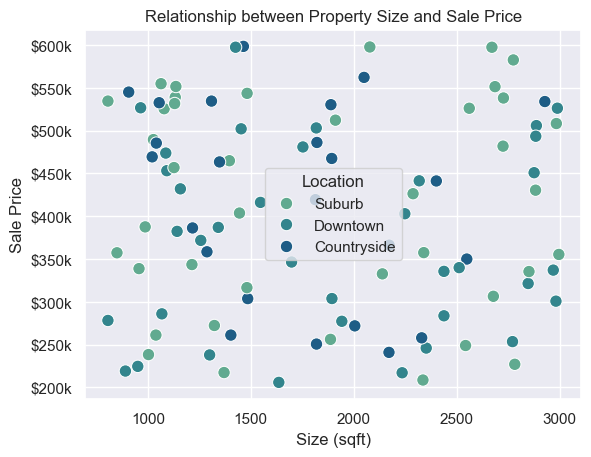

In [161]:
# SalePrice vs Size_sqft
sns.scatterplot(data=properties_df, x='Size_sqft', y='SalePrice', hue='Location', palette='crest', s=80)
plt.title('Relationship between Property Size and Sale Price')
plt.xlabel('Size (sqft)')
plt.ylabel('Sale Price')
plt.yticks([200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000],
           ['$200k', '$250k', '$300k', '$350k', '$400k', '$450k', '$500k', '$550k', '$600k'])
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_14872\2771881879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='SalePrice', data=properties_df,  palette='crest')


Text(0.5, 1.0, 'SalePrice by Location')

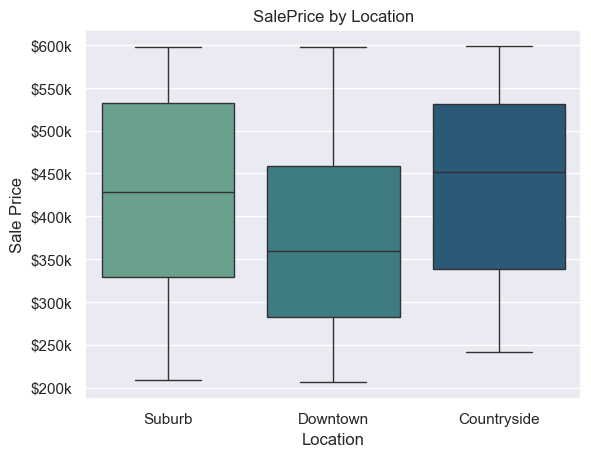

In [173]:
# SalePrice by Location
sns.boxplot(x='Location', y='SalePrice', data=properties_df,  palette='crest')
plt.title('Sale Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Sale Price')
plt.yticks([200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000],
           ['$200k', '$250k', '$300k', '$350k', '$400k', '$450k', '$500k', '$550k', '$600k'])
plt.title('SalePrice by Location')

We will create a relationship (bivariate) analysis for SalePrice versus Size_sqft in 3 separate scatter plots to see if there is a correlation.

In [187]:
# Copy the data
data_copy = properties_df.copy()

# Get the data for suburb only
suburb_df = data_copy[data_copy['Location'] == 'Suburb']

# Get the data for downtown only
downtown_df = data_copy[data_copy['Location'] == 'Downtown']

# Get the data for the countryside only
countryside_df = data_copy[data_copy['Location'] == 'Countryside']

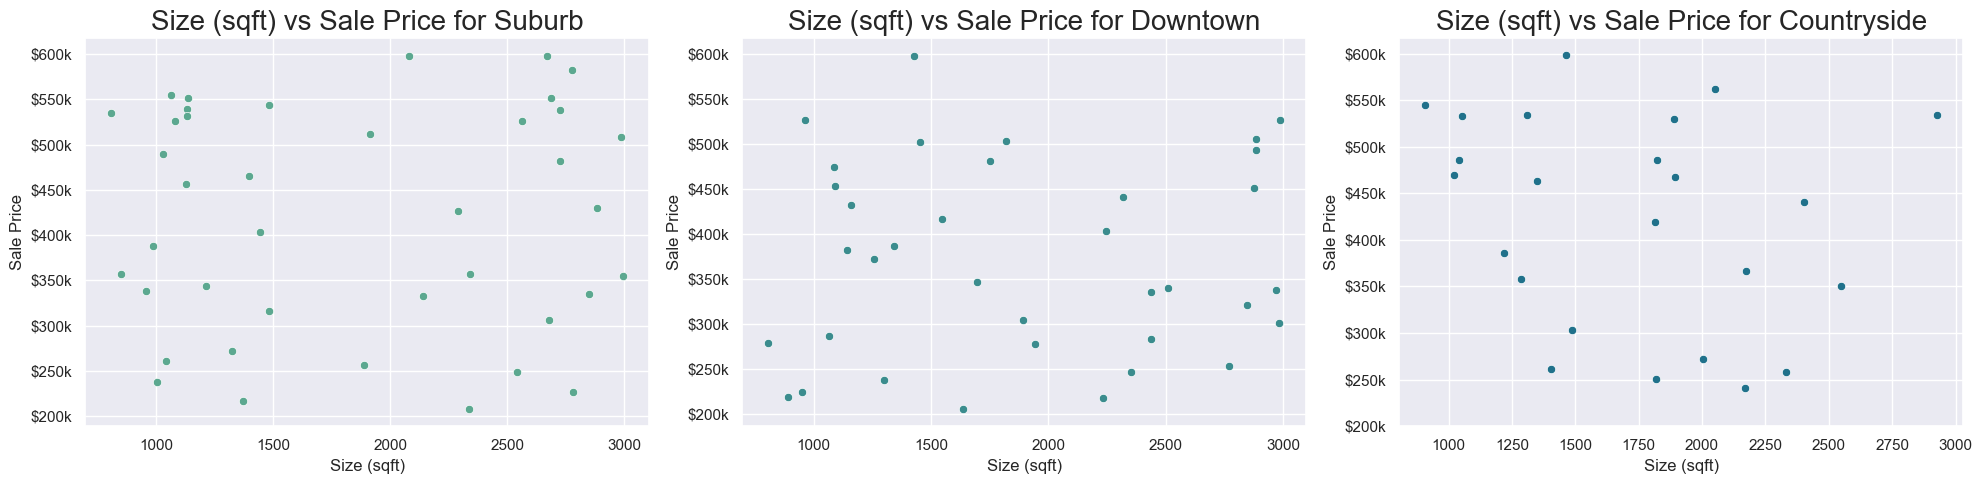

In [239]:
# Let us plot each of them in separate graphs
yticks_old = [200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000]
yticks_new = ['$200k', '$250k', '$300k', '$350k', '$400k', '$450k', '$500k', '$550k', '$600k']

xlabel = 'Size (sqft)'
ylabel = 'Sale Price'

# Initialize the figure size
plt.figure(figsize=(20,5))

# Suburb
plt.subplot(1, 3, 1)
sns.scatterplot(data=suburb_df, x='Size_sqft', y='SalePrice', color=colors[2])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.yticks(yticks_old, yticks_new)
plt.title('Size (sqft) vs Sale Price for Suburb', fontsize=20)

# Downtown
plt.subplot(1, 3, 2)
sns.scatterplot(data=downtown_df, x='Size_sqft', y='SalePrice', color=colors[4])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.yticks(yticks_old, yticks_new)
plt.title('Size (sqft) vs Sale Price for Downtown', fontsize=20)

# Countryside
plt.subplot(1, 3, 3)
sns.scatterplot(data=countryside_df, x='Size_sqft', y='SalePrice', color=colors[6])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.yticks(yticks_old, yticks_new)
plt.title('Size (sqft) vs Sale Price for Countryside', fontsize=20)

plt.tight_layout()
plt.show()